# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 4 submission</b></u>

### Roster Name: Bernard Tan
### Preferred Name (if different): Bernard
### Student ID: 015215317
### Email address: bernard.tan@sjsu.edu


##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [51]:
 # Citation :
# 1. From Canvas Project Example (Jupyter Notebook, SVM.Iris.ipynb, SVM.Breast.
,→ipynb, Train_validation_test_Iris.ipynb)
# 2. https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60␣
,→(PCA Using Python)
# 3. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.
,→plot_confusion_matrix.html (Horizontal X Label)
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


In [ ]:
np.random.seed(42)

#### Code the solution

In [53]:
# Load Dataset
df = pd.read_csv (r'homework4_input_data.csv')
Y = df ['Class']
X = df.drop (['Class', 'id'], axis = 1)


In [56]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])


In [58]:
finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)


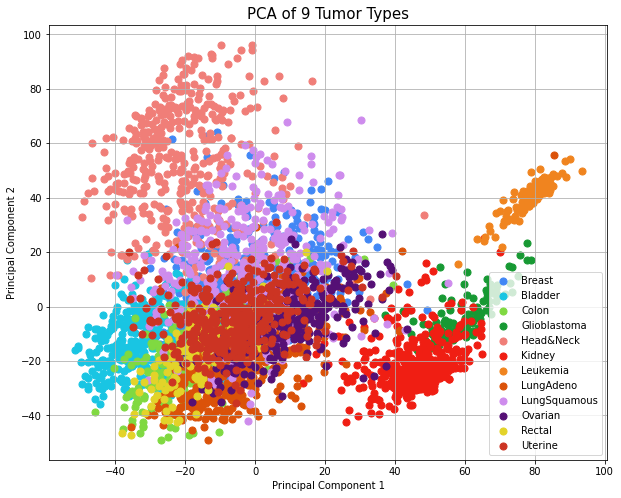

In [62]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('PCA of 9 Tumor Types', fontsize = 15)

targets = ["Breast", "Bladder", "Colon", "Glioblastoma", "Head&Neck", "Kidney", "Leukemia", "LungAdeno", "LungSquamous", "Ovarian", "Rectal", "Uterine"]
colors = ['#4287f5', '#19c5e3', '#80d941', '#179933', '#f07e78', '#f01e13', '#f0841f', '#db5209', '#ce8ced', '#551075', '#e3d329', '#cc3423']


for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

In [ ]:
 # Data Rescale
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)


In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3468, 3000), (3468,), (868, 3000), (868,))

In [65]:
model = LinearSVC()

In [70]:
res = cross_val_score(model, X_train, Y_train, cv=5, n_jobs=-1)
print('Individual Cross-Validation Accuracies : ')
print (res)
print('Mean Cross-Validation Accuracies : ')
print (res.mean())


Individual Cross-Validation Accuracies : 
[0.96829971 0.95533141 0.96397695 0.96392496 0.96969697]
Mean Cross-Validation Accuracies : 
0.9642460005572397


In [71]:
model.fit(X_train,Y_train)
print('Accuracy of linear SVC on training set: {:.2f}'.format(model.score(X_train, Y_train)))
print('Accuracy of linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of linear SVC on training set: 1.00
Accuracy of linear SVC on test set: 0.97


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


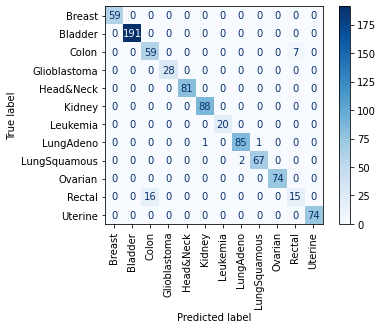

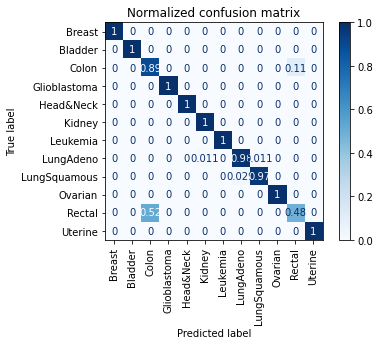

In [72]:
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                display_labels=targets,
                                cmap=plt.cm.Blues,
                                normalize=normalize, xticks_rotation='vertical')
    
disp.ax_.set_title(title)
plt.show()
